In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import glob

In [16]:
# Define dataset path
DATASET_PATH = "/kaggle/input/human-faces/Humans"
IMG_SIZE = (64, 64)

# Load images
image_paths = glob.glob(os.path.join(DATASET_PATH, "**", "*.jpg"), recursive=True) + \
              glob.glob(os.path.join(DATASET_PATH, "**", "*.png"), recursive=True)

if len(image_paths) == 0:
    raise ValueError("No images found! Check the dataset path or file extensions.")

def load_images(image_paths, img_size):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=img_size)
        img = img.convert("RGB")
        img = img_to_array(img) / 127.5 - 1  # Normalize to [-1, 1]
        images.append(img)
    return np.array(images)

x_data = load_images(image_paths, IMG_SIZE)
split_idx = int(0.8 * len(x_data))
x_train, x_test = x_data[:split_idx], x_data[split_idx:]

img_shape = x_train.shape[1:]
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

input_dim = x_train.shape[1]
encoding_dim = 256  # Increased encoding size




In [17]:
# Define autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(input_dim, activation="tanh")(encoded)  # Use 'tanh' for [-1,1] output

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss="mse")  # Changed loss to MSE

# Train the autoencoder
autoencoder.fit(
    x_train, x_train,
    epochs=40,  # Increased epochs
    batch_size=128,  # Reduced batch size for stability
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Reconstruct images
decoded_imgs = autoencoder.predict(x_test)

# Denormalize images
x_test = (x_test + 1) / 2
decoded_imgs = (decoded_imgs + 1) / 2

Epoch 1/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.2657 - val_loss: 0.1272
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.1146 - val_loss: 0.0946
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 0.0854 - val_loss: 0.0790
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0709 - val_loss: 0.0689
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0614 - val_loss: 0.0653
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0570 - val_loss: 0.0616
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0531 - val_loss: 0.0555
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0479 - val_loss: 0.0529
Epoch 9/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0459 - val_loss: 0.0514
Epoch 10/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0437 - val_loss: 0.0497
Epoch 11/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0419 - val_loss: 0.0502
Epoch 12/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/ste

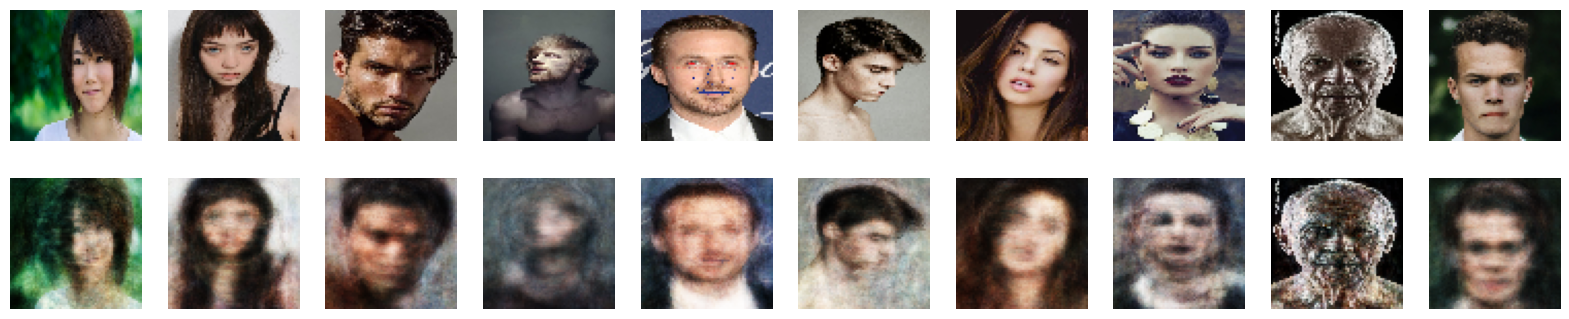

In [18]:
# Display results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(img_shape))
    ax.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(img_shape))
    ax.axis("off")

plt.show()
